# Continuous Control

---

In this notebook, we use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program. This is the 20 agents version. For the single agent version please run Continuous_Control.ipynb file in the same folder.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Windows_x86_64_20_agents/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
i = 0
while i<200:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    i += 1
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

### 4. Training the agent

Now it's time to train the agent to solve the environment!  When training the environment, it is set to `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from agent_v20_agents import Agent_DDPG
import random

# parameters for the agent
f = 3
lr = 3e-4
lra = 1e-4

agent = Agent_DDPG(state_size = states.shape[1], action_size = brain.vector_action_space_size, num_agents = num_agents, random_seed = 2, learning_frequency = f, lr_actor = lra, lr_critic = lr, weight_decay = 0)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

Actor v2
Actor v2
cuda:0


In [10]:
def ddpg_train(max_episodes = 100, max_time_steps = 100, trial = 0, timer_widget = None):
    scores_deque = deque(maxlen=100)
    scores = []
    current_episode_score = 0
    mean_score_deque = 0
    max_score = -np.inf
    reset_noise_t = 10000  # reset noise every N steps
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                 # get the current state (for each agent)
    steps = 0
    flag_solved = False
    print("Training start")
    for episode in range(max_episodes):
        score = np.zeros(num_agents) 
        agent.reset()                            # reset OU noise at the start of the episode
        
        if steps % 2000 == 0:                # do hard update every 2000 gradient steps
            agent.soft_update(agent.critic_local, agent.critic_target, 1.0)
            agent.soft_update(agent.actor_local, agent.actor_target, 1.0)
        
        for t in range(max_time_steps):
            
            if t%reset_noise_t == 0:
                agent.reset()
            
            actions = agent.act(states)                           # agent actions
            env_info = env.step(actions)[brain_name]              # send actions to the environment
            
            # get environment feedback and reward
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            rewards = [0.1 if rew > 0 else 0 for rew in rewards]
            dones = env_info.local_done
            
            # store in replay buffer and learn if buffer large enough
            agent.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            score += rewards
            steps += 1
            if np.any(dones):
                break 
        scores_deque.append(score)
        scores.append(score)

        current_episode_score = np.mean(score)
        mean_score_deque = np.mean(scores_deque)
        
        if current_episode_score > max_score:
            max_score = current_episode_score
        
        # if the past 100 scores is above the 30.0 mark and this is the first time it is seen
        if mean_score_deque > 30.0 and flag_solved == False and episode>98:
            print('\rProblem solved in {} episodes, average score over past 100 episodes: {:.2f}'.format(episode, mean_score_deque))
            flag_solved = True

        if episode >0 and episode % 10 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor{}.pth'.format(trial))
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic{}.pth'.format(trial))
            print('\rEpisode {}\tAverage Score: {:.2f}\tEpisode Score: {:.2f}\tBest Score: {:.2f}'.format(episode, mean_score_deque, current_episode_score, max_score))
            # update progress widget bar if widget object provided
            if timer_widget != None:
                timer_widget.update(episode+1)
        else:
            print('\rEpisode {}\tAverage Score: {:.2f}\tBest Score: {:.2f}'.format(episode, mean_score_deque, max_score), end="")

    torch.save(agent.actor_local.state_dict(), 'checkpoint_actor{}.pth'.format(trial))
    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic{}.pth'.format(trial))
    print('\rEpisode {}\tAverage Score: {:.2f}\tEpisode Score: {}\tBest Score: {:.2f}'.format(episode, mean_score_deque, current_episode_score, max_score))
    return scores

In [ ]:
max_episodes = 650

# widget bar to display progress
import progressbar as pb
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=max_episodes).start()

# extension name of the checkpoint
trial = "_20_agents_Model_actor128-128_critic256-256_f3_cLR3e-4_aLR1e-4_GAE-0.0_vector_v3"

s = ddpg_train(max_episodes = max_episodes, max_time_steps = 1000, trial = trial, timer_widget = timer)
         
#print average over last 50 episodes
print("update every {} steps, critic LR = {}, actor LR = {}. Average score over last 50 episodes = {:.2f}".format(f, lr, lra, np.mean(s[-50:])))
                
timer.finish()

Training start
Episode 9	Average Score: 1.52	Best Score: 4.02

Episode 10	Average Score: 1.75	Episode Score: 4.06	Best Score: 4.06
Episode 19	Average Score: 2.47	Best Score: 10.46

Episode 20	Average Score: 2.84	Episode Score: 10.41	Best Score: 10.46
Episode 29	Average Score: 3.96	Best Score: 15.56

Episode 30	Average Score: 4.48	Episode Score: 20.13	Best Score: 20.13
Episode 39	Average Score: 5.29	Best Score: 21.55

Episode 40	Average Score: 5.58	Episode Score: 17.32	Best Score: 21.55
Episode 49	Average Score: 6.37	Best Score: 24.31

Episode 50	Average Score: 6.69	Episode Score: 22.33	Best Score: 24.31
Episode 59	Average Score: 7.27	Best Score: 28.56

Episode 60	Average Score: 7.62	Episode Score: 28.65	Best Score: 28.65
Episode 69	Average Score: 8.23	Best Score: 30.07

Episode 70	Average Score: 8.41	Episode Score: 21.20	Best Score: 30.07
Episode 79	Average Score: 8.83	Best Score: 30.07

Episode 80	Average Score: 9.04	Episode Score: 25.55	Best Score: 30.07
Episode 89	Average Score: 9.32	Best Score: 30.79

Episode 90	Average Score: 9.56	Episode Score: 31.50	Best Score: 31.50
Episode 99	Average Score: 10.00	Best Score: 34.96

Episode 100	Average Score: 10.27	Episode Score: 29.57	Best Score: 34.96
Episode 109	Average Score: 11.27	Best Score: 34.96

Episode 110	Average Score: 11.54	Episode Score: 30.75	Best Score: 34.96
Episode 119	Average Score: 12.66	Best Score: 36.78

Episode 120	Average Score: 12.87	Episode Score: 31.09	Best Score: 36.78
Episode 129	Average Score: 13.51	Best Score: 36.78

Episode 130	Average Score: 13.65	Episode Score: 33.41	Best Score: 36.78
Episode 139	Average Score: 14.19	Best Score: 36.78

Episode 140	Average Score: 14.31	Episode Score: 29.38	Best Score: 36.78
Episode 149	Average Score: 14.65	Best Score: 36.78

Episode 150	Average Score: 14.72	Episode Score: 29.15	Best Score: 36.78
Episode 159	Average Score: 14.99	Best Score: 36.78

Episode 160	Average Score: 14.98	Episode Score: 27.93	Best Score: 36.78
Episode 169	Average Score: 15.12	Best Score: 36.78

Episode 170	Average Score: 15.18	Episode Score: 27.01	Best Score: 36.78
Episode 179	Average Score: 15.35	Best Score: 37.97

Episode 180	Average Score: 15.33	Episode Score: 23.70	Best Score: 37.97
Episode 189	Average Score: 15.42	Best Score: 37.97

Episode 190	Average Score: 15.48	Episode Score: 37.25	Best Score: 37.97
Episode 199	Average Score: 15.53	Best Score: 37.97

Episode 200	Average Score: 15.57	Episode Score: 33.78	Best Score: 37.97
Episode 209	Average Score: 15.63	Best Score: 37.97

Episode 210	Average Score: 15.65	Episode Score: 32.93	Best Score: 37.97
Episode 219	Average Score: 15.63	Best Score: 37.97

Episode 220	Average Score: 15.55	Episode Score: 23.16	Best Score: 37.97
Episode 229	Average Score: 15.74	Best Score: 39.61

Episode 230	Average Score: 15.78	Episode Score: 37.32	Best Score: 39.61
Episode 239	Average Score: 15.91	Best Score: 39.61

Episode 240	Average Score: 15.95	Episode Score: 33.69	Best Score: 39.61
Episode 249	Average Score: 16.13	Best Score: 41.83

Episode 250	Average Score: 16.24	Episode Score: 40.16	Best Score: 41.83
Episode 259	Average Score: 16.50	Best Score: 41.83

Episode 260	Average Score: 16.59	Episode Score: 36.80	Best Score: 41.83
Episode 269	Average Score: 16.83	Best Score: 46.15

Episode 270	Average Score: 16.95	Episode Score: 38.15	Best Score: 46.15
Episode 279	Average Score: 17.15	Best Score: 46.15

Episode 280	Average Score: 17.26	Episode Score: 34.76	Best Score: 46.15
Episode 289	Average Score: 17.75	Best Score: 46.15

Episode 290	Average Score: 17.79	Episode Score: 41.66	Best Score: 46.15
Episode 299	Average Score: 17.89	Best Score: 46.15

Episode 300	Average Score: 17.73	Episode Score: 18.08	Best Score: 46.15
Episode 309	Average Score: 17.94	Best Score: 46.15

Episode 310	Average Score: 18.10	Episode Score: 48.48	Best Score: 48.48
Episode 319	Average Score: 18.29	Best Score: 56.05

Episode 320	Average Score: 18.43	Episode Score: 37.39	Best Score: 56.05
Episode 329	Average Score: 18.54	Best Score: 56.05

Episode 330	Average Score: 18.57	Episode Score: 40.17	Best Score: 56.05
Episode 339	Average Score: 18.63	Best Score: 56.05

Episode 340	Average Score: 18.69	Episode Score: 39.09	Best Score: 56.05
Episode 349	Average Score: 19.08	Best Score: 56.05

Episode 350	Average Score: 19.09	Episode Score: 41.79	Best Score: 56.05
Episode 359	Average Score: 19.44	Best Score: 56.05

Episode 360	Average Score: 19.52	Episode Score: 44.33	Best Score: 56.05
Episode 369	Average Score: 19.78	Best Score: 56.05

Episode 370	Average Score: 19.86	Episode Score: 46.32	Best Score: 56.05
Episode 379	Average Score: 20.14	Best Score: 56.05

Episode 380	Average Score: 20.21	Episode Score: 41.69	Best Score: 56.05
Episode 389	Average Score: 20.24	Best Score: 56.05

Episode 390	Average Score: 20.31	Episode Score: 48.40	Best Score: 56.05
Episode 399	Average Score: 20.76	Best Score: 56.05

Episode 400	Average Score: 20.98	Episode Score: 40.69	Best Score: 56.05
Episode 409	Average Score: 21.46	Best Score: 56.05

Episode 410	Average Score: 21.51	Episode Score: 53.78	Best Score: 56.05
Episode 419	Average Score: 21.63	Best Score: 56.05

Episode 420	Average Score: 21.71	Episode Score: 44.84	Best Score: 56.05
Episode 429	Average Score: 22.14	Best Score: 56.05

Episode 430	Average Score: 22.20	Episode Score: 46.14	Best Score: 56.05
Episode 439	Average Score: 22.53	Best Score: 56.05

Episode 440	Average Score: 22.52	Episode Score: 37.35	Best Score: 56.05
Episode 449	Average Score: 22.73	Best Score: 56.05

Episode 450	Average Score: 22.76	Episode Score: 44.54	Best Score: 56.05
Episode 459	Average Score: 22.70	Best Score: 57.11

Episode 460	Average Score: 22.86	Episode Score: 60.04	Best Score: 60.04
Episode 469	Average Score: 23.04	Best Score: 60.04

Episode 470	Average Score: 23.03	Episode Score: 44.63	Best Score: 60.04
Episode 479	Average Score: 23.27	Best Score: 60.04

Episode 480	Average Score: 23.46	Episode Score: 60.08	Best Score: 60.08
Episode 489	Average Score: 23.91	Best Score: 60.24

Episode 490	Average Score: 23.98	Episode Score: 55.22	Best Score: 60.24
Episode 499	Average Score: 24.19	Best Score: 60.24

Episode 500	Average Score: 24.39	Episode Score: 61.00	Best Score: 61.00
Episode 509	Average Score: 25.04	Best Score: 65.88

Episode 510	Average Score: 25.15	Episode Score: 64.07	Best Score: 65.88
Episode 519	Average Score: 25.70	Best Score: 65.88

Episode 520	Average Score: 25.81	Episode Score: 55.47	Best Score: 65.88
Episode 529	Average Score: 26.38	Best Score: 70.33

Episode 530	Average Score: 26.55	Episode Score: 63.04	Best Score: 70.33
Episode 539	Average Score: 27.31	Best Score: 70.33

Episode 540	Average Score: 27.60	Episode Score: 66.28	Best Score: 70.33
Episode 549	Average Score: 28.17	Best Score: 70.33

Episode 550	Average Score: 28.43	Episode Score: 70.08	Best Score: 70.33
Episode 559	Average Score: 29.41	Best Score: 73.02

Episode 560	Average Score: 29.46	Episode Score: 65.30	Best Score: 73.02
Episode 569	Average Score: 29.87	Best Score: 73.02

Problem solved in 570 episodes, average score over past 100 episodes: 30.13
Episode 570	Average Score: 30.13	Episode Score: 70.84	Best Score: 73.02
Episode 579	Average Score: 30.72	Best Score: 73.02

Episode 580	Average Score: 30.80	Episode Score: 67.46	Best Score: 73.02
Episode 589	Average Score: 31.31	Best Score: 73.02

Episode 590	Average Score: 31.41	Episode Score: 64.59	Best Score: 73.02
Episode 599	Average Score: 31.95	Best Score: 73.02

Episode 600	Average Score: 32.07	Episode Score: 72.95	Best Score: 73.02
Episode 609	Average Score: 31.92	Best Score: 73.02

Episode 610	Average Score: 31.99	Episode Score: 70.76	Best Score: 73.02
Episode 619	Average Score: 32.60	Best Score: 77.90

Episode 620	Average Score: 32.88	Episode Score: 82.82	Best Score: 82.82
Episode 629	Average Score: 32.71	Best Score: 82.82

Episode 630	Average Score: 32.89	Episode Score: 81.33	Best Score: 82.82
Episode 639	Average Score: 33.37	Best Score: 82.82

Episode 640	Average Score: 33.47	Episode Score: 76.70	Best Score: 82.82
Episode 645	Average Score: 33.83	Best Score: 83.12

In [39]:
timer.finish()

Now let's consider a possible transfer learning from the 1 agent version. The networks for the actor and critic networks having the same structure for the various layers, it may work almost out of the box for the 20 agents version agent.

The following code imports the previously trained weights and launches the training routing to see how faster we can go in the traning starting with this already trained model.

In [11]:
# extension name of the checkpoint from the single agent version
trial = "_Model_actor128-128_critic256-256_f10_cLR3e-4_aLR1e-4_GAE-0.0"

agent.actor_local.load_state_dict(torch.load('checkpoint_actor{}.pth'.format(trial)))
agent.actor_target.load_state_dict(torch.load('checkpoint_actor{}.pth'.format(trial)))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic{}.pth'.format(trial)))
agent.critic_target.load_state_dict(torch.load('checkpoint_critic{}.pth'.format(trial)))

max_episodes = 150

# widget bar to display progress
import progressbar as pb
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=max_episodes).start()

# extension name of the checkpoint
trial = "_20_agents_Model_actor128-128_critic256-256_f3_cLR3e-4_aLR1e-4_GAE-0.0_v2"

s = ddpg_train(max_episodes = max_episodes, max_time_steps = 1000, trial = trial, timer_widget = timer)
         
#print average over last 50 episodes
print("update every {} steps, critic LR = {}, actor LR = {}. Average score over last 50 episodes = {:.2f}".format(f, lr, lra, np.mean(s[-50:])))
                
timer.finish()

Training start


Episode 0	Average Score: 55.58	Episode Score: 55.58	Best Score: 55.58
Episode 9	Average Score: 30.27	Best Score: 64.00

Episode 10	Average Score: 33.27	Episode Score: 63.32	Best Score: 64.00
Episode 19	Average Score: 31.43	Best Score: 68.55

Episode 20	Average Score: 33.60	Episode Score: 76.85	Best Score: 76.85
Episode 29	Average Score: 33.38	Best Score: 77.08

Episode 30	Average Score: 34.70	Episode Score: 74.47	Best Score: 77.08
Episode 39	Average Score: 34.13	Best Score: 77.08

Episode 40	Average Score: 35.18	Episode Score: 77.15	Best Score: 77.15
Episode 49	Average Score: 34.87	Best Score: 77.23

Episode 50	Average Score: 35.55	Episode Score: 69.47	Best Score: 77.23
Episode 59	Average Score: 35.26	Best Score: 78.71

Episode 60	Average Score: 35.96	Episode Score: 77.93	Best Score: 78.71
Episode 69	Average Score: 35.61	Best Score: 78.71

Episode 70	Average Score: 36.21	Episode Score: 78.55	Best Score: 78.71
Episode 79	Average Score: 35.83	Best Score: 78.71

Episode 80	Average Score: 36.34	Episode Score: 76.92	Best Score: 78.71
Episode 89	Average Score: 35.94	Best Score: 78.71

Episode 90	Average Score: 36.35	Episode Score: 73.29	Best Score: 78.71
Episode 98	Average Score: 36.45	Best Score: 78.71Problem solved in 99 episodes, average score over past 100 episodes: 36.09
Episode 99	Average Score: 36.09	Best Score: 78.71

Episode 100	Average Score: 36.34	Episode Score: 80.98	Best Score: 80.98
Episode 109	Average Score: 37.08	Best Score: 86.87

Episode 110	Average Score: 37.25	Episode Score: 80.97	Best Score: 86.87
Episode 119	Average Score: 37.68	Best Score: 86.87

Episode 120	Average Score: 37.69	Episode Score: 77.94	Best Score: 86.87
Episode 129	Average Score: 37.85	Best Score: 86.87

Episode 130	Average Score: 37.96	Episode Score: 85.41	Best Score: 86.87
Episode 139	Average Score: 38.36	Best Score: 86.87

Episode 140	Average Score: 38.34	Episode Score: 74.64	Best Score: 86.87
Episode 148	Average Score: 38.72	Best Score: 87.72

Episode 149	Average Score: 38.72	Episode Score: 0.09000000000000001	Best Score: 87.72
update every 3 steps, critic LR = 0.0003, actor LR = 0.0001. Average score over last 50 episodes = 40.12


Last test is to try an on-policy algorithm such as the A2C. The following cell defines the training loop function and launches the training.

In [5]:
def a2c_train(max_episodes = 100, max_time_steps = 100, trial = 0, timer_widget = None):
    scores_deque = deque(maxlen=100)
    scores = []
    current_episode_score = 0
    mean_score_deque = 0
    max_score = -np.inf
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                 # get the current state (for each agent)
    steps = 0
    flag_solved = False
    ep_before_stop_training = 50
    ep_since_best_score = 0
    best_avg_score = -np.inf
    lr_drop = 0.9
    print("Training start")
    for episode in range(max_episodes):
            
        env_inst = env.reset(train_mode=True)[brain_name]                       # reset the environment
        score = np.zeros(num_agents) 
        dones = [False]*num_agents
                
        for t in range(max_time_steps):
            
            action, log_prob, value = agent_a2c.act(states, train_mode = True)        # agent actions
            env_info = env.step(action.detach().cpu().numpy())[brain_name]            # send actions to the environment
            
            # get environment feedback and reward
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            rewards = [0.1 if rew > 0 else 0 for rew in rewards]
            dones = env_info.local_done
              
            # store in experience list
            agent_a2c.step(action, log_prob, value, rewards, dones, next_states)
            
            if (t>0 or episode >0) and (t+1)%agent_a2c.learning_freq == 0:
                agent_a2c.learn(agent_a2c.experiences, 0.95)
                
            states = next_states
            score += rewards
            steps += 1
            if np.any(dones):
                print(dones)
                print(t)
                break 
        scores_deque.append(score)
        scores.append(score)

        current_episode_score = np.mean(score)
        mean_score_deque = np.mean(scores_deque)

        agent_a2c.adapt_learning_rate(0.995)

        if current_episode_score > max_score:
            max_score = current_episode_score
            torch.save(agent_a2c.actor_critic.state_dict(), 'checkpoint_actorcritic{}_Best.pth'.format(trial))
            lr_drop = 0.9  #reset lr drop to initial value as learning is good
        
        if episode > 10 and mean_score_deque >= best_avg_score:
            best_avg_score = mean_score_deque
            ep_since_best_score = 0
        else:
            ep_since_best_score -= 1
        
        # if learning seems to be stalling or worsening
        if episode > 100 and ep_since_best_score <= -10:
            # restart from parameters that already reached high scores
            if max_score > 10.0:
                print('\rReloading previous parameters')
                agent_a2c.actor_critic.load_state_dict(torch.load('checkpoint_actorcritic{}_Best.pth'.format(trial)))
            agent_a2c.adapt_learning_rate(lr_drop)
            print('\rEpisode {}. Decreasing learning rate to {}'.format(episode, agent_a2c.lr))
            ep_since_best_score = 0
            lr_drop *= 0.9
        
        # if the past 100 scores is above the 30.0 mark and this is the first time it is seen
        #if mean_score_deque > 30.0 and flag_solved == False and episode>98:
        #    print('\rProblem solved in {} episodes, average score over past 100 episodes: {:.3f}'.format(episode, mean_score_deque))
        #    flag_solved = True

        if episode > 0 and episode % 25 == 0:
            torch.save(agent_a2c.actor_critic.state_dict(), 'checkpoint_actorcritic{}.pth'.format(trial))
            print('\rEpisode {}\tAverage Score: {:.3f}\tEpisode Score: {:.3f}\tBest Score: {:.3f}'.format(episode, mean_score_deque, current_episode_score, max_score))
            # update progress widget bar if widget object provided
            if timer_widget != None:
                timer_widget.update(episode+1)
        else:
            print('\rEpisode {}\tAverage Score: {:.3f}\tEpisode Score: {:.3f}\tBest Score: {:.3f}'.format(episode, mean_score_deque,current_episode_score, max_score), end="")
        
        if flag_solved == True:
            ep_before_stop_training -= 1
        
        if ep_before_stop_training <= 0:
            break

    torch.save(agent_a2c.actor_critic.state_dict(), 'checkpoint_actorcritic{}.pth'.format(trial))
    print('\rEpisode {}\tAverage Score: {:.3f}\tBest Score: {:.3f}'.format(episode, mean_score_deque, max_score))
    return scores



In [6]:
from agent_v20_agents import Agent_A2C
import random

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# parameters for the agent
f = 5
lr = 1e-5

# extension name of the checkpoint
trial = "_20_agents_A2C"

# instantiate A2C agent
agent_a2c = Agent_A2C(state_size = states.shape[1], action_size = brain.vector_action_space_size, num_agents = num_agents, random_seed = 2, learning_frequency = f, lr = lr, weight_decay = 0)

max_episodes = 200

# widget bar to display progress
import progressbar as pb
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=max_episodes).start()

s_a2c = a2c_train(max_episodes = max_episodes, max_time_steps = 1000, trial = trial, timer_widget = timer)
         
#print average over last 50 episodes
print("update every {} steps, A2C LR = {}. Average score over last 50 episodes = {:.2f}".format(f, lr, np.mean(s_a2c[-50:])))

timer.finish()


ActorCritic


Training start
Episode 24	Average Score: 45.000	Episode Score: 42.325	Best Score: 50.970

Episode 25	Average Score: 45.084	Episode Score: 47.200	Best Score: 50.970
Episode 49	Average Score: 45.080	Episode Score: 45.685	Best Score: 50.970

Episode 50	Average Score: 45.107	Episode Score: 46.460	Best Score: 50.970
Episode 74	Average Score: 45.247	Episode Score: 46.595	Best Score: 53.970

Episode 75	Average Score: 45.248	Episode Score: 45.275	Best Score: 53.970
Episode 99	Average Score: 45.772	Episode Score: 46.175	Best Score: 53.970

Episode 100	Average Score: 45.762	Episode Score: 42.160	Best Score: 53.970
Reloading previous parameters
Episode 101. Decreasing learning rate to 5.397550887480598e-06
Episode 124	Average Score: 46.213	Episode Score: 51.000	Best Score: 53.970

Episode 125	Average Score: 46.116	Episode Score: 37.460	Best Score: 53.970
Episode 149	Average Score: 46.744	Episode Score: 47.815	Best Score: 53.970

Episode 150	Average Score: 46.776	Episode Score: 49.585	Best Score: 53.970
Episode 174	Average Score: 47.587	Episode Score: 51.750	Best Score: 55.030

Episode 175	Average Score: 47.613	Episode Score: 47.880	Best Score: 55.030
Reloading previous parameters.861	Episode Score: 49.485	Best Score: 55.030
Episode 196. Decreasing learning rate to 3.0173933285852537e-06
Episode 198	Average Score: 47.882	Episode Score: 52.085	Best Score: 55.030

Episode 199	Average Score: 47.935	Best Score: 55.030
update every 5 steps, A2C LR = 1e-05. Average score over last 50 episodes = 48.84


### 5. Test a trained agent
In the next code cell, the weights of a trained agent are loaded and then the agent is used in the environment. The score reached should be most of the times significantly above +30.

In [9]:
# uncomment next lines to load a DDPG agent and comment the A2C lines
#agent = Agent_DDPG(state_size = states.shape[1], action_size = brain.vector_action_space_size, num_agents = num_agents, random_seed = 2, learning_frequency = 20, lr_actor = 1e-3, lr_critic = 1e-4, weight_decay = 0)
#trial = "_20_agents_Model_actor128-128_critic256-256_f3_cLR3e-4_aLR1e-4_GAE-0.0_vector_v3"

#agent.actor_local.load_state_dict(torch.load('checkpoint_actor{}.pth'.format(trial)))
#agent.actor_target.load_state_dict(torch.load('checkpoint_actor{}.pth'.format(trial)))
#agent.critic_local.load_state_dict(torch.load('checkpoint_critic{}.pth'.format(trial)))
#agent.critic_target.load_state_dict(torch.load('checkpoint_critic{}.pth'.format(trial)))

# uncomment next lines to load an A2C agent
agent_a2c = Agent_A2C(state_size = states.shape[1], action_size = brain.vector_action_space_size, num_agents = num_agents, random_seed = 2, learning_frequency = f, lr = lr, weight_decay = 0)
agent_a2c.actor_critic.load_state_dict(torch.load('checkpoint_actorcritic_20_agents_A2C_Best.pth'.format(trial)))


# no change to the below lines whatever the agent used
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

while True:
    actions = agent.act(states, add_noise = False, train_mode = False)[0].cpu().numpy()     # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 29.13099934887141


In [44]:
env.close()

### 6. Display training plot
In the next code cell, the graph of the score reached by the 20 agents on average during the training and the 100-episodes moving average is shown. This 100-episode moving average is the value against which the environment is considered solved or not.

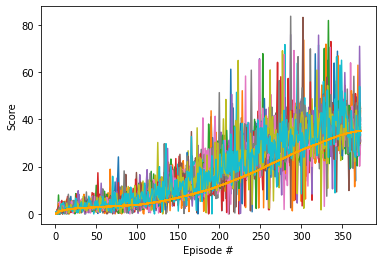

In [11]:
# compute rolling average
rolling_mean = np.copy(s_a2c)
ma = 100

for i in range(len(rolling_mean)):
    rolling_mean[i] = (float)(np.mean(s_a2c[max(0,i-ma):i+1]))
    

# display graph
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(s_a2c)+1), s_a2c)
plt.plot(np.arange(1, len(s_a2c)+1), rolling_mean, label='100 episodes moving average', color='orange')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()